# Machine Learning Project : Electricity Price Explanation

# I. Data preprocessing
## 1. Import

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import spearmanr

from sklearn.model_selection import KFold

## 2. Data importation and basic visualization

In [2]:
X_df =pd.read_csv('X_train_NHkHMNU.csv', delimiter= ',')
y_df =pd.read_csv('y_train_ZAN5mwg.csv', delimiter= ',')
X_test_df =pd.read_csv('X_test_final.csv', delimiter= ',')
df = pd.merge(X_df,y_df,on='ID')
print(df.shape)
df.head(10)

(1494, 36)


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
5,1520,467,FR,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457,0.932105
6,1546,144,FR,-0.234965,-0.677085,0.399588,-0.399588,0.183998,-0.986235,-0.183998,...,-1.658394,-0.529800,-0.318920,-1.220760,-0.512991,0.147507,1.889739,0.498226,0.681739,0.192680
7,1069,1136,FR,0.332223,-0.546797,-0.507773,0.507773,NaN,0.569585,NaN,...,-0.744328,-0.051535,-0.701035,-0.394857,1.990978,0.902719,0.206769,0.993304,-0.223739,0.112850
8,1323,83,FR,-0.023023,-0.604694,-1.196787,1.196787,-0.519339,0.373109,0.519339,...,-0.207390,0.009356,-0.261496,-0.841560,-1.024980,-1.564174,2.688208,3.061210,3.755240,0.076153
9,1618,307,FR,0.564657,0.273776,-0.439063,0.439063,-0.636654,0.342057,0.636654,...,-0.972344,-0.806435,-0.752273,-0.767578,-0.371475,-0.459768,-1.487154,-0.692378,-0.768283,0.000000


In [3]:
df.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
TARGET                0
dtype: int64

In [4]:
df.sort_values("DAY_ID")

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,472,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


In [5]:
# data types
df.dtypes

ID                    int64
DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
TARGET              

Je regarde le poucentage de valeur manquante de chaque colonne

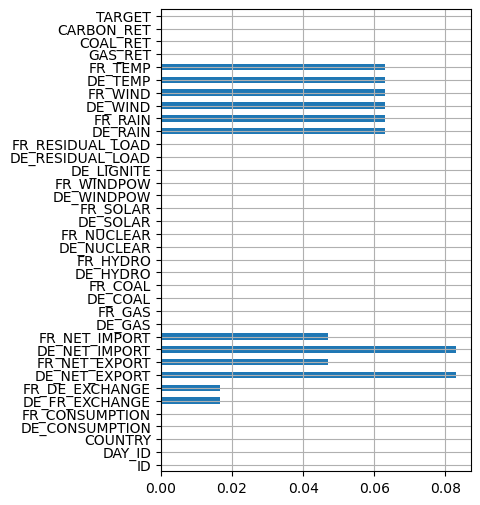

In [6]:
nb_missing = df.isna().sum()
rate_missing = nb_missing / df.ID.nunique()
fig, ax = plt.subplots(figsize=(4,6))
ax1 = ax
rate_missing.plot(kind="barh", ax=ax1)
ax1.grid()

Je vérifie qu'il n'y ai pas de doublons

In [7]:
doublons = df.duplicated()
print(doublons.sum())

0


Je check la distribution de chaque feature 

Text(0.5, 1.0, 'TARGET')

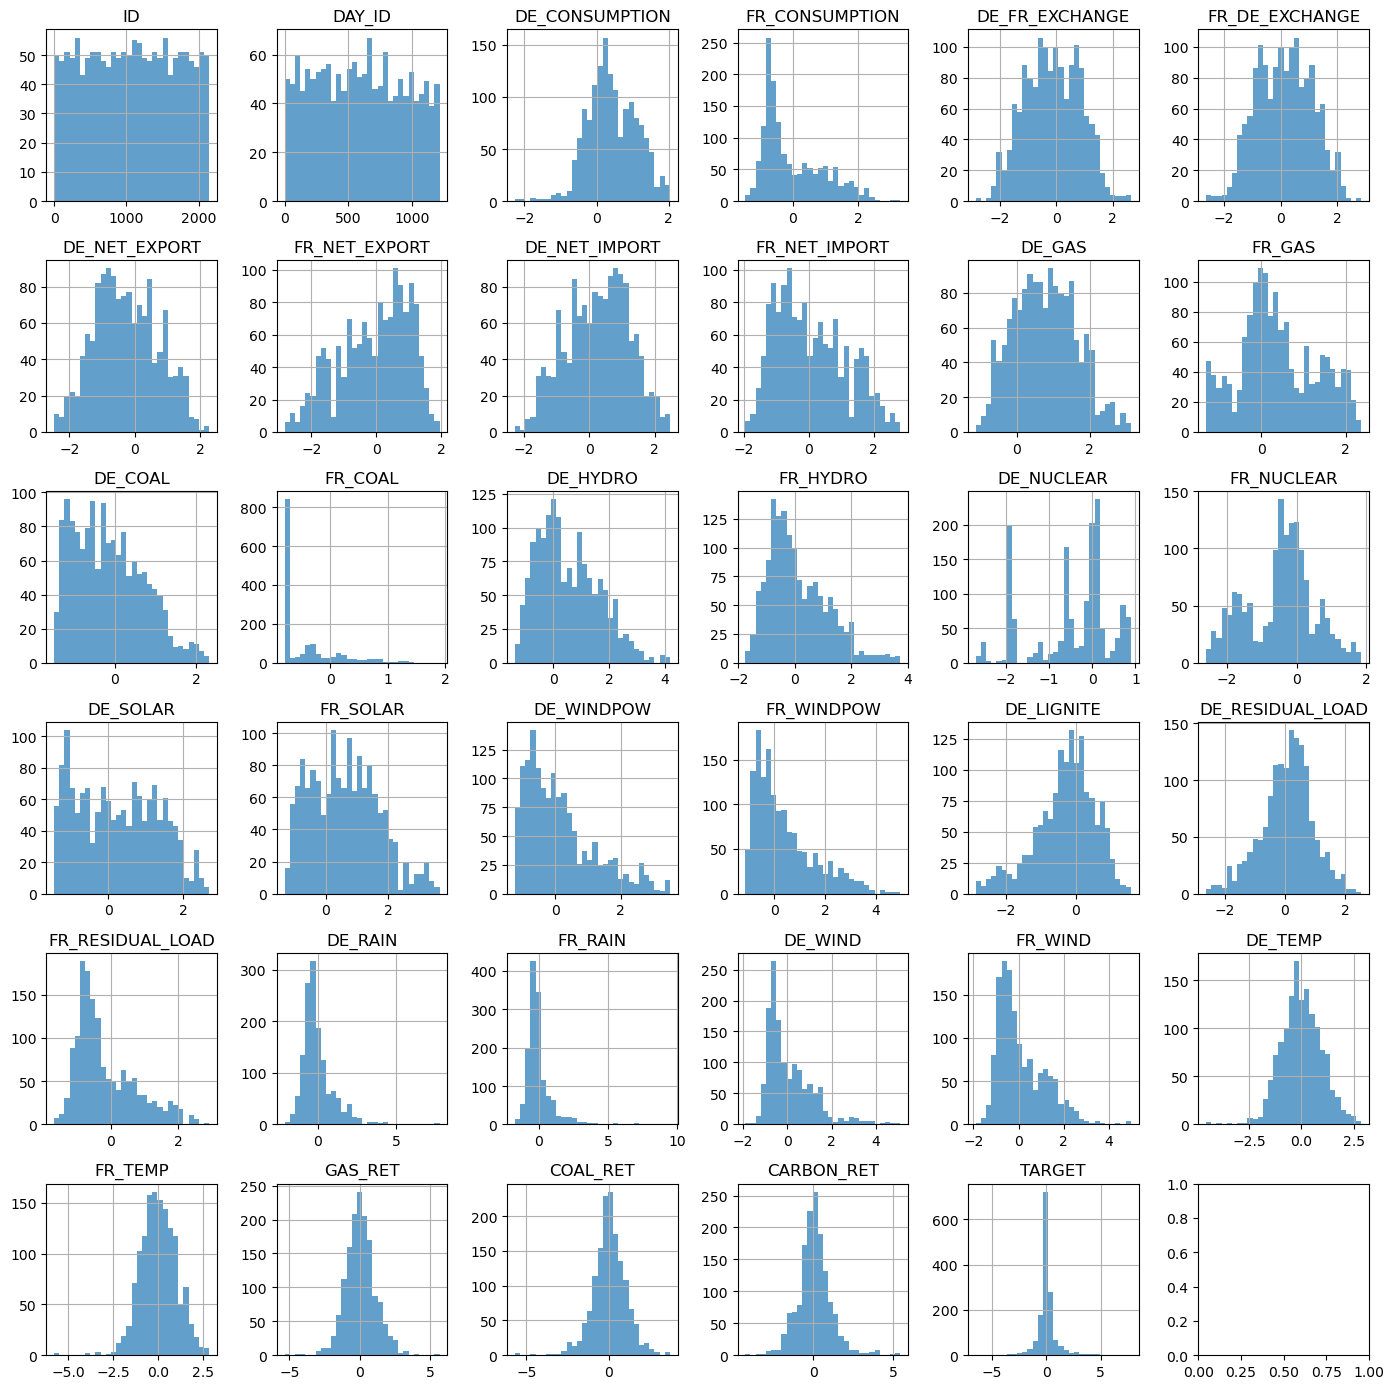

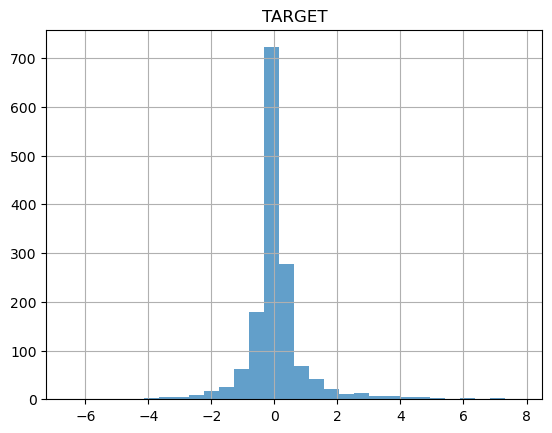

In [8]:
features = [feature for feature in df.columns if feature != "COUNTRY"]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    ax1.grid()
    df[feature].hist(bins= 30, ax=ax1, alpha=0.7)

plt.tight_layout()

fig, ax = plt.subplots()
ax1 = ax
y_df["TARGET"].hist(bins= 30, ax=ax1, alpha=0.7)
ax1.set_title("TARGET")

On separe la data en 2 partie pour voir la distribution des features de la France et de l'Allemagne de maniere independante.

Nb of data points by country:
FR    851
DE    643
Name: COUNTRY, dtype: int64


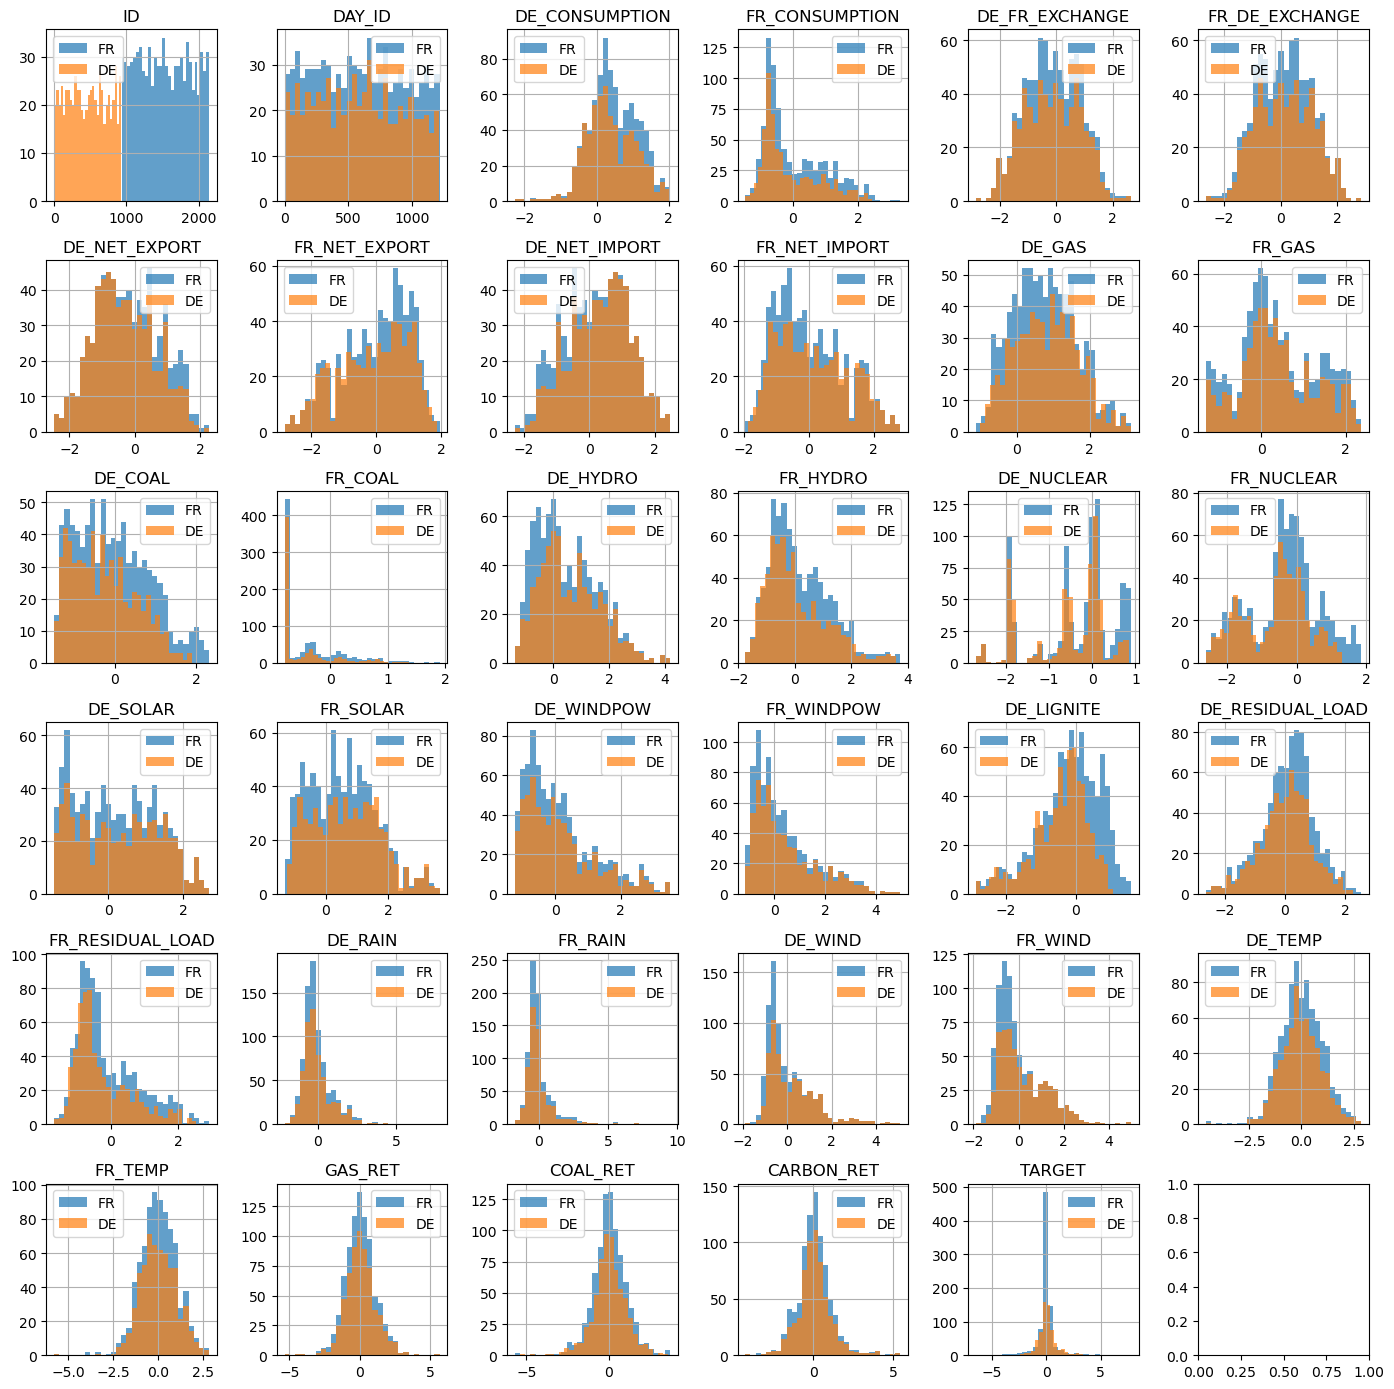

In [9]:
features = [feature for feature in df.columns if feature != "COUNTRY"]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

print("Nb of data points by country:")
print(df.COUNTRY.value_counts())

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    ax1.grid()
    df[df.COUNTRY == "FR"][feature].hist(bins= 30, ax=ax1, alpha=0.7, label= "FR")
    df[df.COUNTRY == "DE"][feature].hist(bins= 30, ax=ax1, alpha=0.7, label= "DE")
    ax1.legend()

plt.tight_layout()

Nb of data points by country:
FR    851
DE    643
Name: COUNTRY, dtype: int64


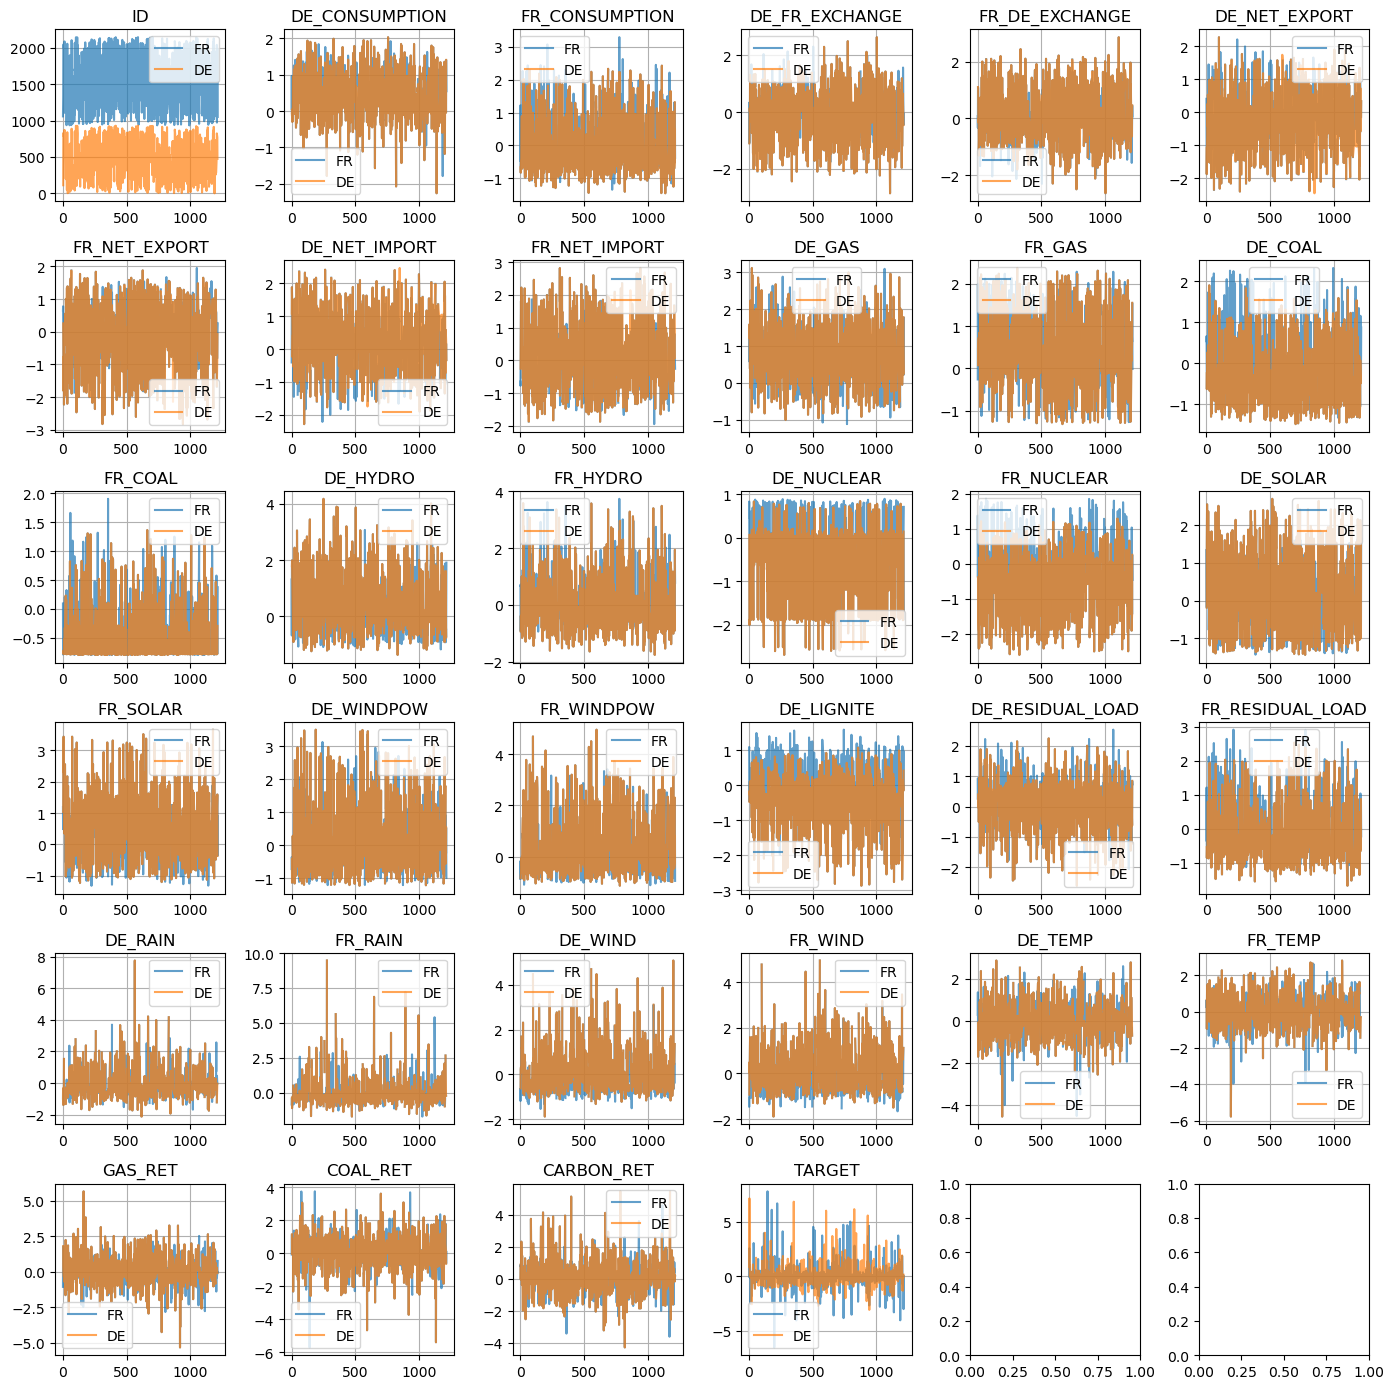

In [10]:
# Check time series
features = [feature for feature in df.columns if not feature in ["COUNTRY", "DAY_ID"]]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

print("Nb of data points by country:")
print(df.COUNTRY.value_counts())

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    time_series = lambda COUNTRY: df[df.COUNTRY == COUNTRY].set_index("DAY_ID")[feature].sort_index()
    ax1.plot(time_series("FR"), label = "FR", alpha=0.7)
    ax1.plot(time_series("DE"), label = "DE", alpha=0.7)
    ax1.legend()
    ax1.grid()

plt.tight_layout()

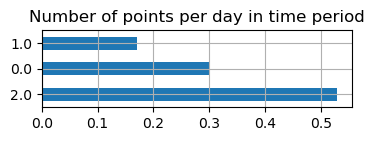

In [11]:
# missing days?
F = df.DAY_ID.value_counts().sort_index()
F = F.reindex(range(F.index.max()))
F = F.fillna(0)
F = F.value_counts()
F /= F.sum()
fig, ax = plt.subplots(figsize=(4,1))
ax1 = ax
ax1.set_title("Number of points per day in time period")
F.plot(kind="barh", ax=ax1)
ax1.grid()

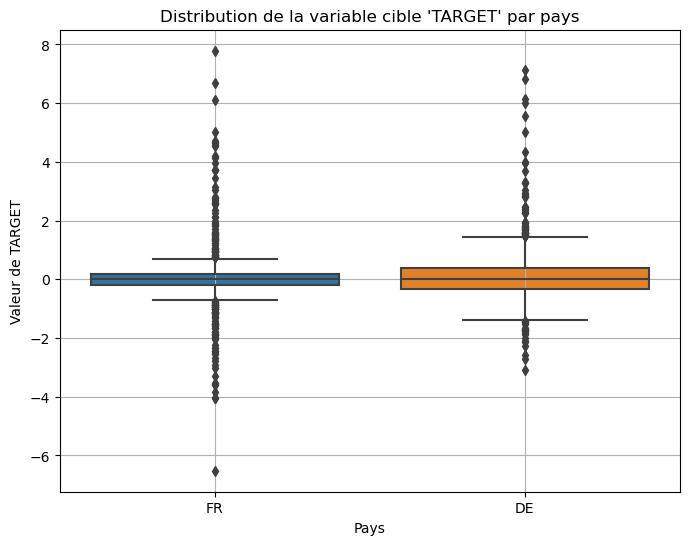

In [12]:

# Création du boxplot pour la variable cible "TARGET" par pays
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='COUNTRY', y='TARGET')
plt.title("Distribution de la variable cible 'TARGET' par pays")
plt.xlabel("Pays")
plt.ylabel("Valeur de TARGET")
plt.grid(True)
plt.show()

On peut voir que la médiane pour les deux pays sont assez similaire et proche de 0 ce qui suggere que les valeur target sont centrées.
On remarque également qu'il semble y avoir de nombreux outlier (valeurs extrêmes) pour la France.

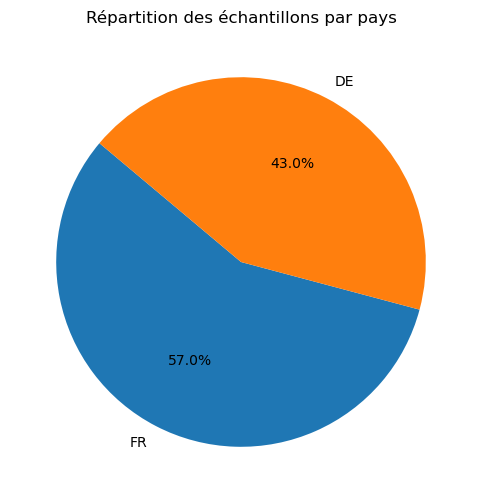

In [13]:
# Comptage des échantillons par pays
country_counts = df['COUNTRY'].value_counts()

# Création du camembert
plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des échantillons par pays")
plt.show()


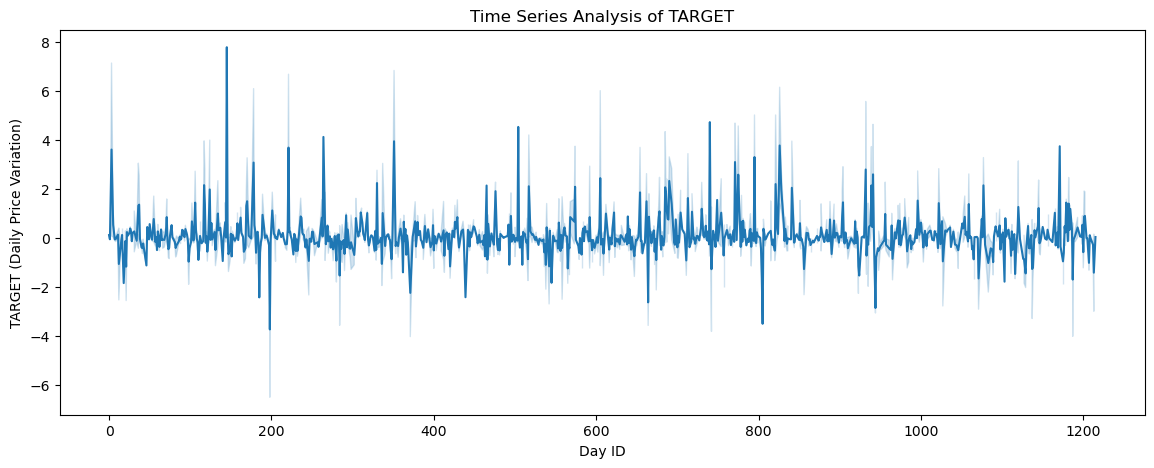

In [14]:
# Plotting the time series of the TARGET variable
plt.figure(figsize=(14, 5))
sns.lineplot(x='DAY_ID', y='TARGET', data=df)
plt.title('Time Series Analysis of TARGET')
plt.xlabel('Day ID')
plt.ylabel('TARGET (Daily Price Variation)')
plt.show()

## 3. Data preprocessing

In [15]:
def preprocess_df(df):
    columns_to_fill = [
    "DE_FR_EXCHANGE", "FR_DE_EXCHANGE", "DE_NET_EXPORT", "FR_NET_EXPORT", 
    "DE_NET_IMPORT", "FR_NET_IMPORT", "DE_RAIN", "FR_RAIN", 
    "DE_WIND", "FR_WIND", "DE_TEMP", "FR_TEMP"
    ]
    for column in columns_to_fill:
        df[column].fillna(df[column].mean(), inplace=True)
    
    df['COUNTRY'] = df['COUNTRY'].apply(lambda x: 1 if x == 'FR' else 0)
   
    return df

print(df.dtypes)

ID                    int64
DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
TARGET              

## 4. Data visualization

In [16]:
def correlation_colonne (df_train_processed,seuil):
    correlations= df_train_processed.corrwith(df_train_processed['TARGET']).abs()
    #On trie les corrélations par ordre décroissant
    correlations= correlations.sort_values(ascending=False)
    correlated_columns = correlations[correlations >seuil].index
    #On les mets dans df_train_bis une dataframe que l'on utilisera pour entrainer le modèle
    df_train_bis= df_train_processed[correlated_columns]
    #On affiche les 10 colonnes avec le plus de corrélation avec le log_price
    print(correlations.sort_values(ascending=False).head(10))
    #On s'assure que toutes les colonnes utilisées pendant l'entraînement sont présentes
    return df_train_bis, correlated_columns

seuil=0.0001
df_train_processed = preprocess_df(df)

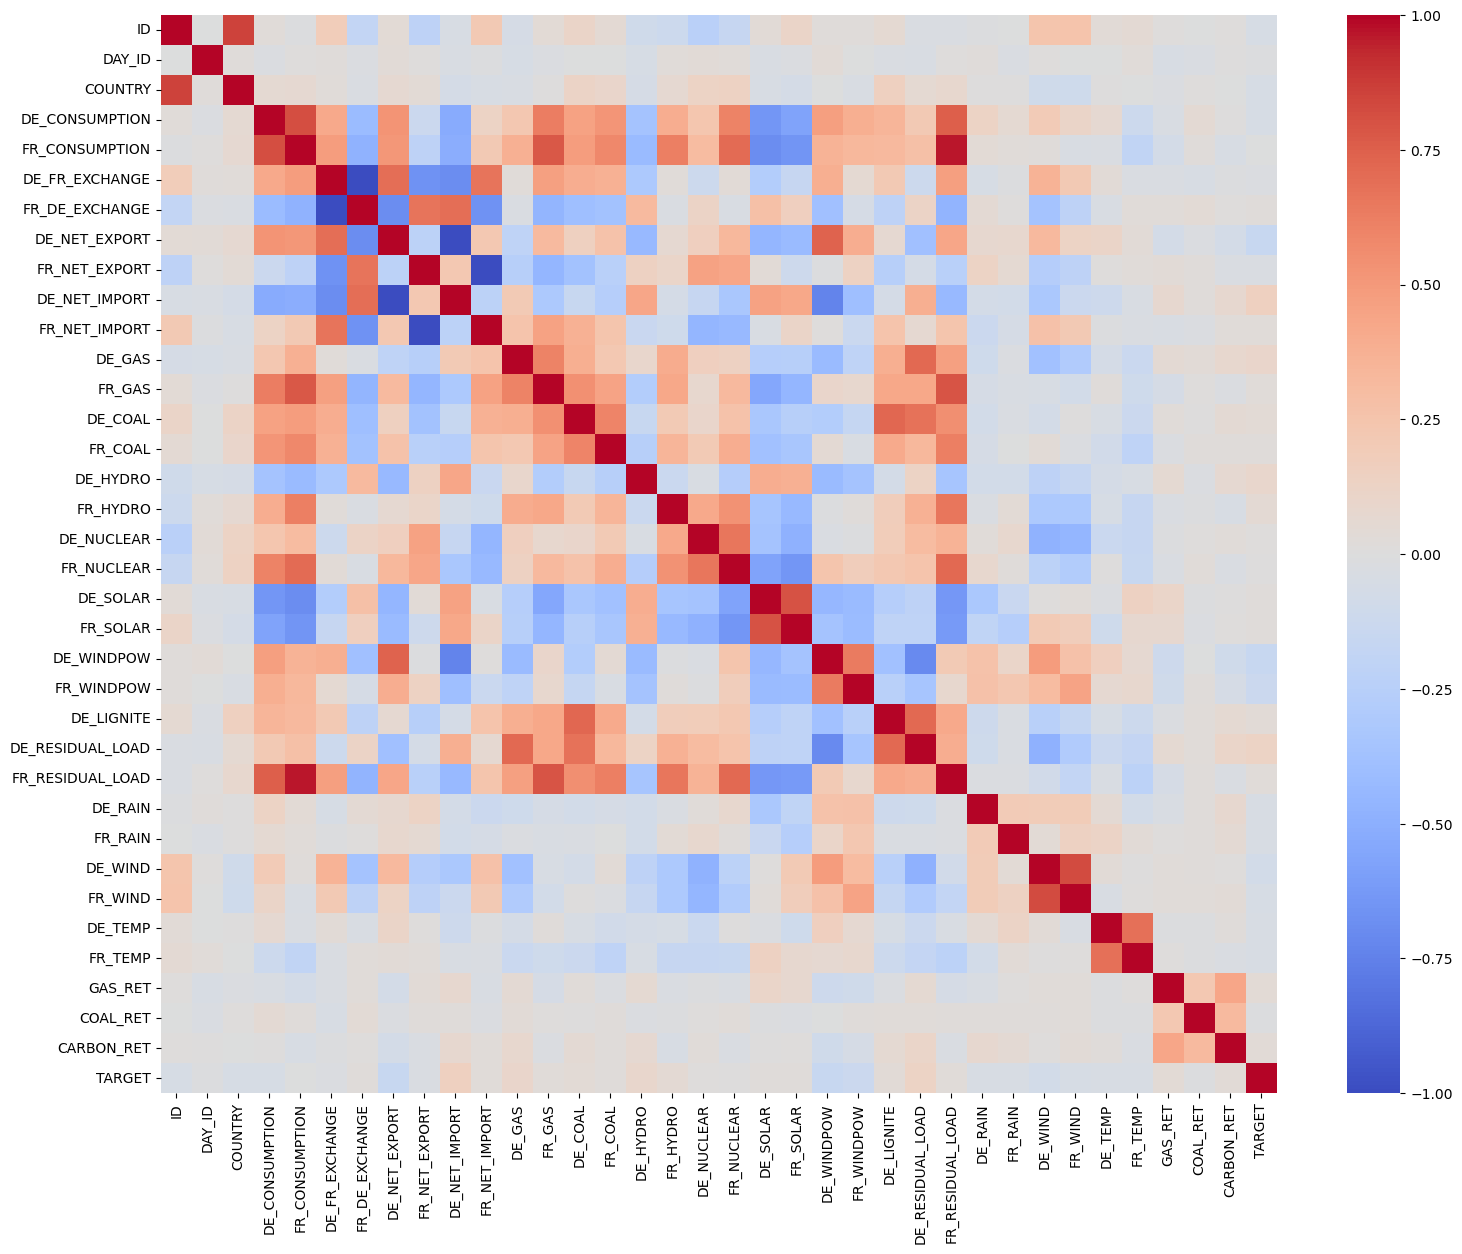

In [17]:
correlations= df_train_processed.select_dtypes(include=['float64', 'int64', 'bool']).corrwith(df_train_processed['TARGET']).abs()
#on augmente le seuil pour prendre moins de colonne et avoir quelque chose de lisible
correlated_columns = correlations[correlations >seuil].index
#On les mets dans df_train_3 spécialemént pour faire une matrice de corrélation avec les colonnes les plus corrélée avec TARGET
df_train_3= df_train_processed[correlated_columns]

correlation_matrix = df_train_3.corr(method='pearson', min_periods=1)
non_numeric_cols = correlation_matrix.select_dtypes(exclude=[np.number]).columns
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# II Model choice
## 5. Pipeline construction to test various model

In [18]:
def Pipeline(scaler, model):
    my_pipeline = make_pipeline(scaler, model)
    return my_pipeline

In [19]:
def Sep_Train_Evaluation(X,y,pipeline):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  pipeline.fit(X_train,y_train)
  y_pred=pipeline.predict(X_test)
  # Calculer le score Spearman
  print(f"Spearman score: {spearmanr(y_test,y_pred).correlation}")

In [20]:
#we are gonna use this pipelines
std_scaler = StandardScaler()
l_model = LinearRegression()
pipe_l = Pipeline(std_scaler,l_model)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
pipe_rf = Pipeline(std_scaler,rf_model)

gb_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.2,max_depth=3,random_state=42)
pipe_gb = Pipeline(std_scaler,gb_model)

In [21]:
df.head(10)

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,1,0.210099,-0.427458,-0.606523,0.606523,-0.256332,0.692860,0.256332,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,1,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,1,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,0,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,1,0.143807,-0.617038,-0.924990,0.924990,-0.256332,0.990324,0.256332,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
5,1520,467,1,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457,0.932105
6,1546,144,1,-0.234965,-0.677085,0.399588,-0.399588,0.183998,-0.986235,-0.183998,...,-1.658394,-0.529800,-0.318920,-1.220760,-0.512991,0.147507,1.889739,0.498226,0.681739,0.192680
7,1069,1136,1,0.332223,-0.546797,-0.507773,0.507773,-0.256332,0.569585,0.256332,...,-0.744328,-0.051535,-0.701035,-0.394857,1.990978,0.902719,0.206769,0.993304,-0.223739,0.112850
8,1323,83,1,-0.023023,-0.604694,-1.196787,1.196787,-0.519339,0.373109,0.519339,...,-0.207390,0.009356,-0.261496,-0.841560,-1.024980,-1.564174,2.688208,3.061210,3.755240,0.076153
9,1618,307,1,0.564657,0.273776,-0.439063,0.439063,-0.636654,0.342057,0.636654,...,-0.972344,-0.806435,-0.752273,-0.767578,-0.371475,-0.459768,-1.487154,-0.692378,-0.768283,0.000000


In [22]:
df_fr = df[df['COUNTRY'] == 1]

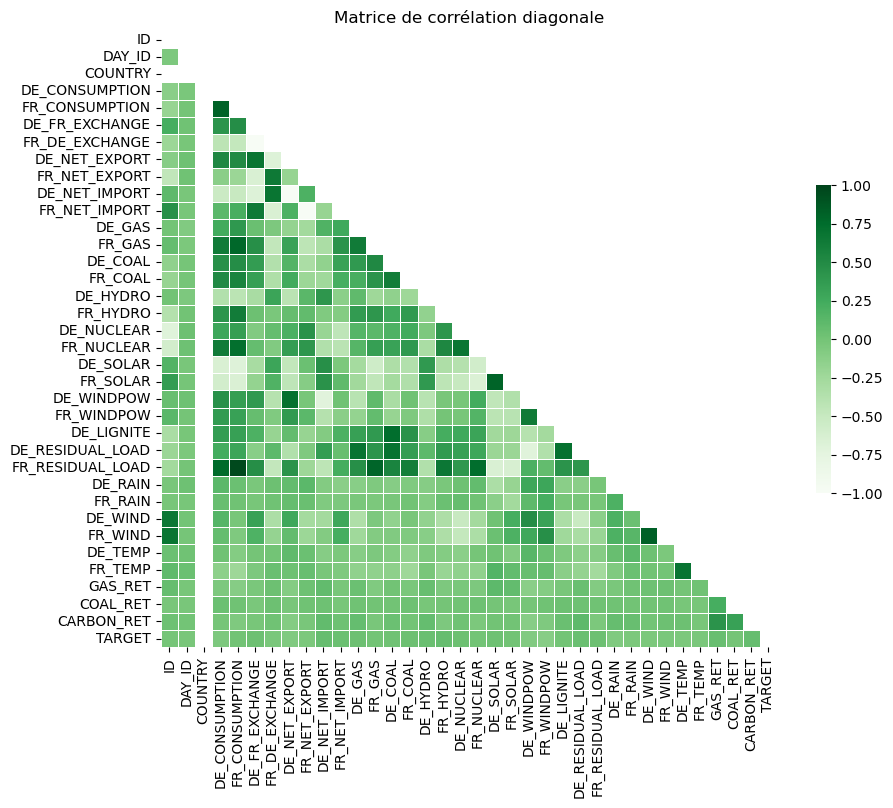

In [38]:

# Calculez la matrice de corrélation
corr_matrix = df_fr.corr()

# Créez une masque pour la diagonale
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Définissez la taille de la figure
plt.figure(figsize=(10, 8))

# Affichez la matrice de corrélation avec des couleurs originales
sns.heatmap(corr_matrix, mask=mask, cmap="Greens", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5},
            annot=False, fmt=".2f", annot_kws={"size": 6})

# Ajoutez un titre
plt.title("Matrice de corrélation diagonale")

# Affichez la figure
plt.show()

In [39]:
X = df_fr.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_fr['TARGET']


Sep_Train_Evaluation(X,y,pipe_l)
Sep_Train_Evaluation(X,y,pipe_rf)
Sep_Train_Evaluation(X,y,pipe_gb)

Spearman score: 0.03485494207343493
Spearman score: 0.2026775433992674
Spearman score: 0.15525125114076951


Here the best model is the bagging model RandomForest and we want to have the best model so we can play on this hyperparameters

- n_estimators: Number of trees the algorithm builds before averaging the predictions.
- max_features: Maximum number of features random forest considers splitting a node.
- mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.
- Criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
- max_leaf_nodes: Maximum leaf nodes in each tree

In [40]:
rf1_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf2_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

pipe_rf1 = Pipeline(std_scaler,rf1_model)
pipe_rf2 = Pipeline(std_scaler,rf2_model)

Sep_Train_Evaluation(X,y,pipe_rf1)
Sep_Train_Evaluation(X,y,pipe_rf2)

Spearman score: 0.2026775433992674
Spearman score: 0.1821730519194486


## 6. Model choice with pipeline construction (DE Dataset)

In [41]:
df_de = df[df['COUNTRY'] == 0]

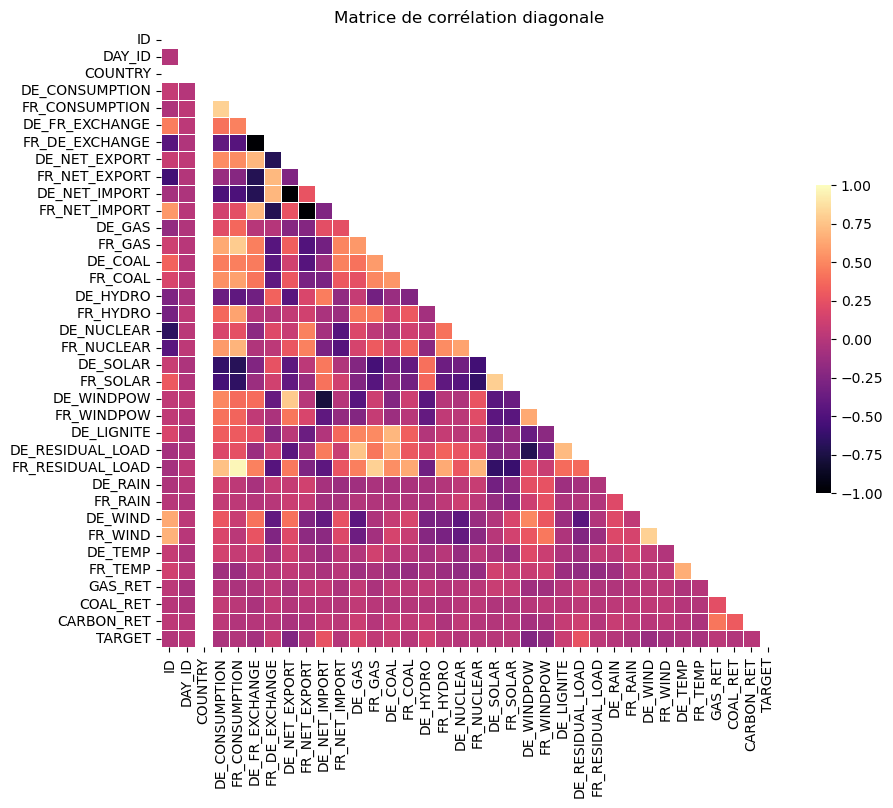

In [43]:
# Calculez la matrice de corrélation
corr_matrix = df_de.corr()

# Créez une masque pour la diagonale
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Définissez la taille de la figure
plt.figure(figsize=(10, 8))

# Affichez la matrice de corrélation avec des couleurs originales
sns.heatmap(corr_matrix, mask=mask, cmap="magma", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5},
            annot=False, fmt=".2f", annot_kws={"size": 6})

# Ajoutez un titre
plt.title("Matrice de corrélation diagonale")

# Affichez la figure
plt.show()

In [44]:
X = df_de.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_de['TARGET']

Sep_Train_Evaluation(X,y,pipe_l)
Sep_Train_Evaluation(X,y,pipe_rf)
Sep_Train_Evaluation(X,y,pipe_gb)

Spearman score: 0.37396578711985695
Spearman score: 0.18331360401101987
Spearman score: 0.16288014311270127


## 7. Cross Validation

In [45]:
# Fonction de validation croisée pour un modèle de régression en utilisant la corrélation de Spearman
def kfoldCrossValidation(X,y,M,k):
  # Set up k-fold cross-validation
  kfold = KFold(n_splits=k, shuffle=True, random_state=42)
  scores = []
  X = np.array(X)
  y = np.array(y)
  # Perform k-fold cross-validation
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the classifier on the training data
    M.fit(X_train, y_train)
    # Predict on the test data
    y_pred_test = M.predict(X_test)
    # Calculate accuracy and store in scores list
    spearman = spearmanr(y_test, y_pred_test).correlation
    scores.append(spearman)
  return scores

In [46]:
X = df_fr.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_fr['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled =std_scaler.fit_transform(X_train)

scores = kfoldCrossValidation(X_train_scaled, y_train, rf1_model, k=3)
for fold, acc in enumerate(scores, 1):
    print(f"Fold {fold} accuracy: {acc}")
average_accuracy = sum(scores) / len(scores)
print(f"Average accuracy: {average_accuracy}")

scores = kfoldCrossValidation(X_train_scaled, y_train, rf2_model, k=3)
for fold, acc in enumerate(scores, 1):
    print(f"Fold {fold} accuracy: {acc}")
average_accuracy = sum(scores) / len(scores)
print(f"Average accuracy: {average_accuracy}")

Fold 1 accuracy: 0.10254656935243406
Fold 2 accuracy: 0.07443299625136084
Fold 3 accuracy: 0.11109696105257028
Average accuracy: 0.09602550888545507
Fold 1 accuracy: 0.10868300095005305
Fold 2 accuracy: 0.11584096124369252
Fold 3 accuracy: 0.11682094702505742
Average accuracy: 0.11378163640626766


In [47]:
X = df_de.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_de['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled =std_scaler.fit_transform(X_train)

scores=kfoldCrossValidation(X_train_scaled, y_train,l_model,3)
for fold, acc in enumerate(scores, 1):
    print(f"Fold {fold} accuracy: {acc}")
average_accuracy = sum(scores) / len(scores)
print(f"Average accuracy: {average_accuracy}")

Fold 1 accuracy: 0.30720739205184616
Fold 2 accuracy: 0.19923680610555117
Fold 3 accuracy: 0.36977464180286557
Average accuracy: 0.29207294665342093


# Annexe/Test

## 8. Use of PCA

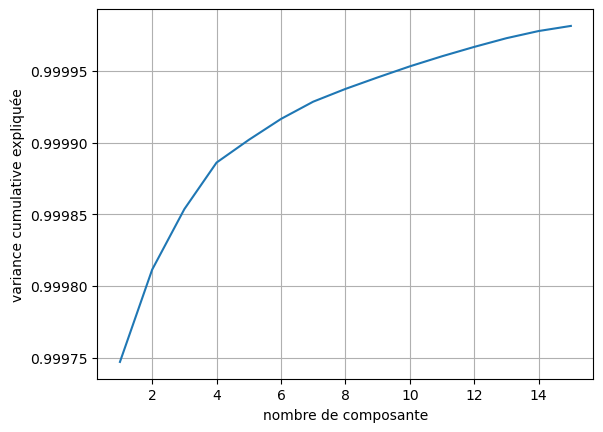

In [30]:
df_fr = df[df['COUNTRY'] == 1]
X = df_fr.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_fr['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n = 15
pca = PCA(n_components=n)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, n+1), explained_variance)
plt.xlabel('nombre de composante')
plt.ylabel('variance cumulative expliquée')
plt.grid(True)
plt.show()

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_pca_train, y_train)

y_pred = rf_model.predict(X_pca_test)
y_pred_train= rf_model.predict(X_pca_train)

print(f"Spearman score: {spearmanr(y_test,y_pred).correlation}")

Spearman score: 0.15262687056118532


In [32]:
df_de = df[df['COUNTRY'] == 0]
X = df_de.drop(columns=['ID', 'TARGET', 'COUNTRY'])
y = df_de['TARGET']

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Calculer le score Spearman
print(f"Spearman score: {spearmanr(y_test,y_pred).correlation}")

Spearman score: 0.356484794275492
